In [1]:
import math
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools
import string
import seaborn as sns
import scipy as sp
import dask
from toydown import GeoUnit, ToyDown
import time
import random
import geopandas as gpd
import pandas as pd
from dask.distributed import Client
import pickle
# client = Client()

In [3]:
city = gpd.read_file("../data/irving_blocks/irving_city_blocks10.shp")
isd = gpd.read_file("../data/irving_blocks/irving_isd_blocks10.shp")

In [7]:
isd[["GEOID10", "VAP10", "HVAP10"]].shape

(2294, 3)

In [8]:
isd.columns.to_list()

['STATEFP10',
 'COUNTYFP10',
 'TRACTCE10',
 'BLOCKCE10',
 'GEOID10',
 'NAME10',
 'MTFCC10',
 'UR10',
 'UACE10',
 'FUNCSTAT10',
 'ALAND10',
 'AWATER10',
 'INTPTLAT10',
 'INTPTLON10',
 'TOTPOP10',
 'NH_WHITE10',
 'NH_BLACK10',
 'NH_AMIN10',
 'NH_ASIAN10',
 'NH_NHPI10',
 'NH_OTHER10',
 'NH_2MORE10',
 'HISP10',
 'H_WHITE10',
 'H_BLACK10',
 'H_AMIN10',
 'H_ASIAN10',
 'H_NHPI10',
 'H_OTHER10',
 'H_2MORE10',
 'VAP10',
 'HVAP10',
 'WVAP10',
 'BVAP10',
 'AMINVAP10',
 'ASIANVAP10',
 'NHPIVAP10',
 'OTHERVAP10',
 '2MOREVAP10',
 'NAME',
 'state',
 'county',
 'tract',
 'block',
 'geoid',
 'HCVAP09',
 'NHCVAP09',
 'AMNCVAP09',
 'ACVAP09',
 'BCVAP09',
 'HPICVAP09',
 'WCVAP09',
 'CVAP09',
 'HCVAP09M',
 'NHCVAP09M',
 'AMNCVAP09M',
 'ACVAP09M',
 'BCVAP09M',
 'HPICVAP09M',
 'WCVAP09M',
 'CVAP09M',
 'HCPOP00',
 'WCPOP00',
 'BCPOP00',
 'ACPOP00',
 'OTHRCPOP00',
 '2MORCPOP00',
 'HCVAP00',
 'WCVAP00',
 'BCVAP00',
 'ACVAP00',
 'OTHRCVAP00',
 '2MORCVAP00',
 'CPOP00',
 'CVAP00',
 'PCT08',
 'PCT05',
 'PCT05_NM',


In [9]:
com_cols = list(set(isd.columns) & set(city.columns))

In [10]:
irving_blocks = pd.concat([isd, city], axis=0, join="outer",ignore_index=True)[com_cols].drop_duplicates().reset_index(drop=True)

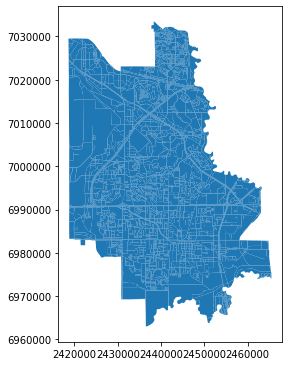

In [11]:
irving_blocks.plot(figsize=(4,8))
plt.show()

In [15]:
irving_blocks.columns

Index(['H_ASIAN10', 'TOTPOP10', 'geoid', 'AMNCVAP09M', 'PCT05', '2MORCPOP00',
       'WCPOP00', 'ALAND10', 'AWATER10', 'CPOP00', 'CVAP09', 'HCPOP00',
       'ACVAP09', 'NAME', 'BCVAP00', 'TRACTCE10', 'H_AMIN10', 'NH_BLACK10',
       'INTPTLON10', 'ACPOP00', 'state', 'INTPTLAT10', 'NH_AMIN10',
       'NH_WHITE10', 'WCVAP09', 'geometry', 'FUNCSTAT10', 'MTFCC10',
       'H_WHITE10', '2MOREVAP10', 'STATEFP10', 'CVAP09M', 'NH_NHPI10',
       'HCVAP09', 'UR10', 'HISP10', 'CVAP00', 'WCVAP09M', 'tract', 'NHPIVAP10',
       'BVAP10', 'NH_ASIAN10', 'HVAP10', 'WCVAP00', 'NHCVAP09', 'BCVAP09',
       'PCT08', 'ACVAP00', 'BCPOP00', 'COUNTYFP10', '2MORCVAP00', 'H_OTHER10',
       'AMINVAP10', 'HCVAP09M', 'UACE10', 'NH_2MORE10', 'PCT08_NM', 'H_NHPI10',
       'OTHRCVAP00', 'PCT05_NM', 'BCVAP09M', 'NHCVAP09M', 'HPICVAP09M',
       'AMNCVAP09', 'BLOCKCE10', 'ACVAP09M', 'OTHERVAP10', 'HCVAP00',
       'HPICVAP09', 'block', 'ASIANVAP10', 'H_2MORE10', 'H_BLACK10', 'VAP10',
       'county', 'NH_OTHER10', '

In [23]:
irving_blocks = irving_blocks[['STATEFP10', 'COUNTYFP10', 'TRACTCE10', 'BLOCKCE10',  'NAME10',
               'MTFCC10', 'UR10', 'UACE10','FUNCSTAT10','ALAND10','AWATER10','INTPTLAT10',
               'GEOID10','NAME','TOTPOP10','NH_WHITE10','NH_BLACK10','NH_AMIN10','NH_ASIAN10',
               'NH_NHPI10','NH_OTHER10','NH_2MORE10','HISP10','H_WHITE10','H_BLACK10','H_AMIN10','H_ASIAN10',
               'H_NHPI10','H_OTHER10','H_2MORE10','VAP10','HVAP10','WVAP10','BVAP10','AMINVAP10','ASIANVAP10',
               'NHPIVAP10', 'OTHERVAP10', '2MOREVAP10',  'HCVAP09',
               'NHCVAP09', 'AMNCVAP09', 'ACVAP09', 'BCVAP09', 'HPICVAP09', 'WCVAP09', 'CVAP09', 'HCVAP09M',
               'NHCVAP09M', 'AMNCVAP09M', 'ACVAP09M', 'BCVAP09M', 'HPICVAP09M', 'WCVAP09M', 'CVAP09M',
               'HCPOP00', 'WCPOP00', 'BCPOP00', 'ACPOP00', 'OTHRCPOP00', '2MORCPOP00', 'HCVAP00', 'WCVAP00',
               'BCVAP00', 'ACVAP00', 'OTHRCVAP00', '2MORCVAP00', 'CPOP00', 'CVAP00', 'PCT08', 'PCT05',
               'PCT05_NM', 'PCT08_NM', 'geometry']]

In [24]:
irving_blocks.drop(columns=["geometry"]).to_csv("../data/irving_blocks10.csv", index=False)

In [16]:
len(irving_blocks.GEOID10.apply(lambda s: s[:-3]).unique())

175

In [25]:
irving_blocks["NHVAP10"] = irving_blocks.VAP10 - irving_blocks.HVAP10

/Users/smaug/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [27]:
df = irving_blocks.query("VAP10 > 500 & HVAP10 > 100")[['GEOID10','TRACTCE10','VAP10', 'HVAP10', 
                                                        'WVAP10', 'BVAP10', 'AMINVAP10', 
                                                        'ASIANVAP10', 'NHPIVAP10', 
                                                        'OTHERVAP10', '2MOREVAP10']]

In [37]:
len(['VAP10', 'HVAP10', 'WVAP10', 'BVAP10', 'AMINVAP10', 'ASIANVAP10', 'NHPIVAP10', 'OTHERVAP10', 'OTHERVAP10'])

9

In [29]:
irving_blocks.shape

(3586, 75)

In [32]:
irving_blocks.set_index("GEOID10", inplace=True)

In [39]:
d = irving_blocks.to_dict(orient='index')
for k, v in d.items():
    d[k] = np.array([v["VAP10"], v["HVAP10"], v["WVAP10"], v["BVAP10"], 
                     v["AMINVAP10"], v["ASIANVAP10"], v["NHPIVAP10"], 
                     v["OTHERVAP10"], v["OTHERVAP10"]])

In [40]:
d

{'481130143123032': array([0, 0, 0, 0, 0, 0, 0, 0, 0]),
 '481130143124018': array([32,  0, 24,  0,  0,  8,  0,  0,  0]),
 '481130142061003': array([0, 0, 0, 0, 0, 0, 0, 0, 0]),
 '481130142061010': array([0, 0, 0, 0, 0, 0, 0, 0, 0]),
 '481130141381010': array([0, 0, 0, 0, 0, 0, 0, 0, 0]),
 '481130142064005': array([459,  66, 241,  61,   2,  67,   0,  15,  15]),
 '481130201001037': array([0, 0, 0, 0, 0, 0, 0, 0, 0]),
 '481130153051005': array([55, 44, 10,  0,  0,  0,  0,  0,  0]),
 '481130143073005': array([54, 10, 39,  1,  0,  2,  0,  2,  2]),
 '481130143124019': array([8, 2, 6, 0, 0, 0, 0, 0, 0]),
 '481130142052013': array([0, 0, 0, 0, 0, 0, 0, 0, 0]),
 '481130142051003': array([0, 0, 0, 0, 0, 0, 0, 0, 0]),
 '481130142061019': array([0, 0, 0, 0, 0, 0, 0, 0, 0]),
 '481130142051001': array([0, 0, 0, 0, 0, 0, 0, 0, 0]),
 '481130142051007': array([0, 0, 0, 0, 0, 0, 0, 0, 0]),
 '481130142041001': array([0, 0, 0, 0, 0, 0, 0, 0, 0]),
 '481139800001133': array([0, 0, 0, 0, 0, 0, 0, 0, 0]),
 '4

In [41]:
with open("../data/full_irving_tree_VAP_HVAP_WVAP_BVAP_AMINVAP_ASIANVAP_NHPIVAP_OTHERVAP_2MOREVAP_2010.p", "wb") as fout:
    pickle.dump(d,fout)

## Set up Country - tract and State - county data

In [72]:
dc_tracts_vap = pd.read_csv("/Users/smaug/Downloads/DECENNIALSF12010-2/DECENNIALSF12010.P11_data_with_overlays_2020-05-22T155152.csv").drop(0)

In [73]:
dc_tracts_pop = pd.read_csv("/Users/smaug/Downloads/DECENNIALSF12010-8/DECENNIALSF12010.P9_data_with_overlays_2020-06-05T104935.csv").drop(0)

In [74]:
tx_counties_vap = pd.read_csv("/Users/smaug/Downloads/DECENNIALSF12010/DECENNIALSF12010.P11_data_with_overlays_2020-05-22T154914.csv").drop(0)

In [75]:
tx_counties_pop = pd.read_csv("/Users/smaug/Downloads/DECENNIALSF12010-7/DECENNIALSF12010.P9_data_with_overlays_2020-06-05T104743.csv").drop(0)

In [76]:
dc_tracts = pd.merge(dc_tracts_pop, dc_tracts_vap, on="GEO_ID")
tx_counties = pd.merge(tx_counties_pop, tx_counties_vap, on="GEO_ID")

In [77]:
variables = [
    # pop
    "P009001",
    "P009002",
    "P009003",
    "P009005",
    "P009006",
    "P009007",
    "P009008",
    "P009009",
    "P009010",
    "P009011",
    # vap
    "P011001",
    "P011002",
    "P011005",
    "P011006",
    "P011007",
    "P011008",
    "P011009",
    "P011010",
    "P011011",
]

keys = [
    # pop
    "TOTPOP",
    "HISP",
    "NHISP",
    "NH_WHITE",
    "NH_BLACK",
    "NH_AMIN",
    "NH_ASIAN",
    "NH_NHPI",
    "NH_OTHER",
    "NH_2MORE",
    # vap
    "VAP",
    "HVAP",
    "WVAP",
    "BVAP",
    "AMINVAP",
    "ASIANVAP",
    "NHPIVAP",
    "OTHERVAP",
    "2MOREVAP",
]
d = {v: k for v,k in zip(variables, keys)}

In [78]:
d

{'P009001': 'TOTPOP',
 'P009002': 'HISP',
 'P009003': 'NHISP',
 'P009005': 'NH_WHITE',
 'P009006': 'NH_BLACK',
 'P009007': 'NH_AMIN',
 'P009008': 'NH_ASIAN',
 'P009009': 'NH_NHPI',
 'P009010': 'NH_OTHER',
 'P009011': 'NH_2MORE',
 'P011001': 'VAP',
 'P011002': 'HVAP',
 'P011005': 'WVAP',
 'P011006': 'BVAP',
 'P011007': 'AMINVAP',
 'P011008': 'ASIANVAP',
 'P011009': 'NHPIVAP',
 'P011010': 'OTHERVAP',
 'P011011': '2MOREVAP'}

In [80]:
dc_tracts = dc_tracts.rename(columns=d)[['GEO_ID',  'VAP', 'HVAP', 'WVAP', 'BVAP', 'AMINVAP',
                                         'ASIANVAP', 'NHPIVAP', 'OTHERVAP', '2MOREVAP',
                                         "TOTPOP", "HISP", "NH_WHITE", "NH_BLACK", "NH_AMIN", 
                                         "NH_ASIAN", "NH_NHPI", "NH_OTHER", "NH_2MORE",]]

In [81]:
tx_counties = tx_counties.rename(columns=d)[['GEO_ID',   'VAP', 'HVAP', 'WVAP', 'BVAP', 'AMINVAP',
                                             'ASIANVAP', 'NHPIVAP', 'OTHERVAP', '2MOREVAP',
                                             "TOTPOP", "HISP", "NH_WHITE", "NH_BLACK", "NH_AMIN",
                                             "NH_ASIAN", "NH_NHPI", "NH_OTHER", "NH_2MORE"]]

In [82]:
tx_counties["GEOID"] = tx_counties.GEO_ID.apply(lambda s: s[9:])

In [83]:
dc_tracts["GEOID"] = dc_tracts.GEO_ID.apply(lambda s: s[9:])

In [103]:
tx_counties.to_csv("texas_counties.csv", index=False)

In [87]:
d_tracts = dc_tracts.set_index("GEOID").to_dict(orient='index')
for k, v in d_tracts.items():
    d_tracts[k] = {"VAP": np.array([v["VAP"], v["HVAP"], v["WVAP"], v["BVAP"], 
                            v["AMINVAP"], v["ASIANVAP"], v["NHPIVAP"], 
                            v["OTHERVAP"], v["2MOREVAP"]], dtype=int),
                   "TOTPOP": np.array([v["TOTPOP"], v["HISP"], v["NH_WHITE"], v["NH_BLACK"], 
                          v["NH_AMIN"], v["NH_ASIAN"], v["NH_NHPI"], 
                          v["NH_OTHER"], v["NH_2MORE"]], dtype=int)}

In [89]:
d_counties = tx_counties.set_index("GEOID").to_dict(orient='index')
for k, v in d_counties.items():
    d_counties[k] = {"VAP": np.array([v["VAP"], v["HVAP"], v["WVAP"], v["BVAP"], 
                            v["AMINVAP"], v["ASIANVAP"], v["NHPIVAP"], 
                            v["OTHERVAP"], v["2MOREVAP"]], dtype=int),
                   "TOTPOP": np.array([v["TOTPOP"], v["HISP"], v["NH_WHITE"], v["NH_BLACK"], 
                          v["NH_AMIN"], v["NH_ASIAN"], v["NH_NHPI"], 
                          v["NH_OTHER"], v["NH_2MORE"]], dtype=int)}

In [92]:
with open("../data/dallas_county_tracts_all_pop_vap.p", "wb") as fout:
    pickle.dump(d_tracts,fout)

In [93]:
with open("../data/texas_counties_all_pop_vap.p", "wb") as fout:
    pickle.dump(d_counties,fout)

In [112]:
{"TOTPOP": tx_counties[['TOTPOP', 'HISP', 'NH_WHITE', 'NH_BLACK', 'NH_AMIN', 'NH_ASIAN', 
                        'NH_NHPI', 'NH_OTHER', 'NH_2MORE']].astype(int).sum().values,
 "VAP": tx_counties[['VAP', 'HVAP', 'WVAP', 'BVAP', 'AMINVAP', 'ASIANVAP', 
                     'NHPIVAP', 'OTHERVAP', '2MOREVAP']].astype(int).sum().values}

{'TOTPOP': array([25145561,  9460921, 11397345,  2886825,    80586,   948426,
           17920,    33980,   319558]),
 'VAP': array([18279737,  6143144,  9074684,  2076282,    61856,   716968,
           12912,    21205,   172686])}

In [94]:
dallas_blocks = gpd.read_file("../data/dallas_county_blocks/dallas_county_blocks10.shp")

In [95]:
dallas_blocks.head()

,STATEFP10,COUNTYFP10,TRACTCE10,BLOCKCE10,GEOID10,NAME10,MTFCC10,UR10,UACE10,FUNCSTAT10,...,ACPOP10M,BCPOP10M,HPICPOP10M,WCPOP10M,CPOP10M,2MRCVAP10,2MRCPOP10,2MRCVAP10M,2MRCPOP10M,geometry
0,48,113,012400,5010,481130124005010,Block 5010,G5040,None,None,S,...,2.870775,2.115308,9.594433,11.634195,12.767396,0.000000,0.000000,47.972167,47.972167,"POLYGON ((2524057.369 6988292.473, 2524004.456..."
1,48,113,018206,2004,481130182062004,Block 2004,G5040,None,None,S,...,13.213873,7.491329,13.213873,19.560694,34.231214,1.560694,1.560694,55.248555,55.248555,"POLYGON ((2542548.972 7013054.026, 2543120.720..."
2,48,113,018206,1004,481130182061004,Block 1004,G5040,None,None,S,...,21.602160,8.280828,11.431143,10.351035,23.672367,0.900090,0.900090,46.984698,46.984698,"POLYGON ((2543970.278 7012230.102, 2544112.732..."
3,48,113,018206,3002,481130182063002,Block 3002,G5040,None,None,S,...,4.946646,9.803354,11.422256,8.364329,26.442073,0.000000,0.000000,57.111280,57.111280,"POLYGON ((2543017.262 7009910.565, 2543242.634..."
4,48,113,018402,1002,481130184021002,Block 1002,G5040,None,None,S,...,2.183873,5.190656,4.019593,7.247928,11.235870,0.791258,2.690279,17.186134,15.983421,"POLYGON ((2541028.206 7006776.149, 2540970.067..."


In [96]:
dallas_blocks.set_index("GEOID10", inplace=True)

In [97]:
d = dallas_blocks.to_dict(orient='index')
for k, v in d.items():
    d[k] = {"VAP": np.array([v["VAP10"], v["HVAP10"], v["WVAP10"], v["BVAP10"], 
                            v["AMINVAP10"], v["ASIANVAP10"], v["NHPIVAP10"], 
                            v["OTHERVAP10"], v["2MOREVAP10"]], dtype=int),
            "TOTPOP": np.array([v["TOTPOP10"], v["HISP10"], v["NH_WHITE10"], v["NH_BLACK10"], 
                          v["NH_AMIN10"], v["NH_ASIAN10"], v["NH_NHPI10"], 
                          v["NH_OTHER10"], v["NH_2MORE10"]], dtype=int)}

In [98]:
d

{'481130124005010': {'VAP': array([38, 12, 22,  0,  0,  2,  0,  0,  2]),
  'TOTPOP': array([49, 17, 27,  0,  0,  2,  0,  0,  3])},
 '481130182062004': {'VAP': array([90, 83,  2,  5,  0,  0,  0,  0,  0]),
  'TOTPOP': array([134, 125,   2,   7,   0,   0,   0,   0,   0])},
 '481130182061004': {'VAP': array([100,  80,  12,   7,   0,   0,   0,   0,   1]),
  'TOTPOP': array([188, 151,  16,  13,   0,   0,   0,   0,   8])},
 '481130182063002': {'VAP': array([59, 39, 18,  0,  1,  1,  0,  0,  0]),
  'TOTPOP': array([94, 72, 20,  0,  1,  1,  0,  0,  0])},
 '481130184021002': {'VAP': array([42,  5, 33,  3,  0,  0,  0,  0,  1]),
  'TOTPOP': array([56, 11, 39,  5,  0,  0,  0,  0,  1])},
 '481130182064004': {'VAP': array([33,  8, 23,  0,  0,  0,  2,  0,  0]),
  'TOTPOP': array([39, 14, 23,  0,  0,  0,  2,  0,  0])},
 '481130182051010': {'VAP': array([0, 0, 0, 0, 0, 0, 0, 0, 0]),
  'TOTPOP': array([0, 0, 0, 0, 0, 0, 0, 0, 0])},
 '481130181103026': {'VAP': array([12,  0, 10,  2,  0,  0,  0,  0,  0]),
 

In [99]:
with open("../data/dallas_county_blocks_all_pop_vap.p", "wb") as fout:
    pickle.dump(d,fout)

In [104]:
d

{'481130124005010': {'VAP': array([38, 12, 22,  0,  0,  2,  0,  0,  2]),
  'TOTPOP': array([49, 17, 27,  0,  0,  2,  0,  0,  3])},
 '481130182062004': {'VAP': array([90, 83,  2,  5,  0,  0,  0,  0,  0]),
  'TOTPOP': array([134, 125,   2,   7,   0,   0,   0,   0,   0])},
 '481130182061004': {'VAP': array([100,  80,  12,   7,   0,   0,   0,   0,   1]),
  'TOTPOP': array([188, 151,  16,  13,   0,   0,   0,   0,   8])},
 '481130182063002': {'VAP': array([59, 39, 18,  0,  1,  1,  0,  0,  0]),
  'TOTPOP': array([94, 72, 20,  0,  1,  1,  0,  0,  0])},
 '481130184021002': {'VAP': array([42,  5, 33,  3,  0,  0,  0,  0,  1]),
  'TOTPOP': array([56, 11, 39,  5,  0,  0,  0,  0,  1])},
 '481130182064004': {'VAP': array([33,  8, 23,  0,  0,  0,  2,  0,  0]),
  'TOTPOP': array([39, 14, 23,  0,  0,  0,  2,  0,  0])},
 '481130182051010': {'VAP': array([0, 0, 0, 0, 0, 0, 0, 0, 0]),
  'TOTPOP': array([0, 0, 0, 0, 0, 0, 0, 0, 0])},
 '481130181103026': {'VAP': array([12,  0, 10,  2,  0,  0,  0,  0,  0]),
 